In [1]:
import pickle
# 'example.txt' 파일 열기 ( 읽기 모드 'r', 인코딩 방식 ' utf-8')
with open('경주(지방swm).txt', 'r', encoding = 'utf-8') as file:
    text = file.read()  # 파일 읽기

In [2]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import font_manager
import matplotlib.pyplot as plt
import networkx as nx
import pickle

In [3]:
[text]

['\ufeff경주(지방swm)\n2024.12.06 금 오전 10:43 ・ 42분 28초\n이수홍\n\n\n참석자 1 \n실제로 이게 아직까지는 저희들 예산도 예산이지만 아직까지 체계적으로 관리되고 있지는 않고요.\n지금 정밀 여과기 같은 경우에는 지금 한 대가 지금 또 고장이 나 있는 상태라 가지고 근데 이걸 수리하려고 하니까 실제로 이게 이게 활용도 면에서 조금 떨어지는 부분이 없잖아 있더라고요.\n보니까 그 수리비도 지금 1년도 안 됐는데 지금 수리비가 한 700만 원\n\n참석자 2 \n정밀요가 하나\n\n참석자 1 \n이게 침수를 해가지고 정전이 됐는데 이게 펌프 쪽이 이제 배수 펌프가 작동을 안 해가지고 이게 침수가 돼가 지금 액추레이터하고 이런 거 교체를 하려고 하니까 금액이 너무 비싸겠다.\n지금\n\n참석자 3 \n밸브실 지하 내에 사량 메시지 그러면 그거에 대한 배수 펌프 작동 안 하거나 개수 펌프 작동 안 한 원인\n\n참석자 1 \n예 그게 전기가 약간 차단이 됐던가 봐요. 때문에 정전 때문에 그래서 이런 것들이 조금 좀 그런 문제에 대한 부분들이 조금 보완이 좀 돼야 안 되겠나 싶어가지고 이거 고쳐놓는다고 그래도 또 그런 문제가 또 있을 수 있거든요.\n\n참석자 2 \n교직은 계속 그럼 침수될 때마다\n\n참석자 1 \n그런데 우리가 모니터 상에서는 이게 뜨지 않아\n\n참석자 3 \n알람을\n\n참석자 1 \n연락이 안 뜨게끔 알람도 안 뜨고 이제 그런 부분들이 있어가지고 이게 지금 hmi 쪽을 조금 어느 정도는 개선을 해야지 뭔가 좀 저희도 이제 문제가 생겼을 때 바로 출동을 할 수 있는데 이게 며칠 있다가 확인이 돼버리니까 좀 그런 것도 문제가 되더라고요.\n\n참석자 3 \n알겠습니다. 우선은 저희가 이 인터뷰 전에 이 질문지 가지고 말씀 좀 드려보고 그런 상황들 저희가 마지막에 조금씩 여쭤보면서 좀 마무리하도록 하겠습니다.\n일단은 거의 이제 1년 넘게 운영을 하셨고 이제 가점 반영된 것도 이제 인지를 하고 계셔서 이제 이 

In [4]:
import re
def text_clean(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern, '', text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern, '', text)
    pattern = '[a-zA-Z0-9]'    # 숫자와 알파벳 제거
    text = re.sub(pattern, '', text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern, '', text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern, '', text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern, '', text)
    pattern = '\n'         # 특수기호제거
    text = re.sub(pattern, '', text)
    return text 

In [5]:
text_clean(text)

'경주지방 금 오전   분 초이수홍참석자  실제로 이게 아직까지는 저희들 예산도 예산이지만 아직까지 체계적으로 관리되고 있지는 않고요지금 정밀 여과기 같은 경우에는 지금 한 대가 지금 또 고장이 나 있는 상태라 가지고 근데 이걸 수리하려고 하니까 실제로 이게 이게 활용도 면에서 조금 떨어지는 부분이 없잖아 있더라고요보니까 그 수리비도 지금 년도 안 됐는데 지금 수리비가 한 만 원참석자  정밀요가 하나참석자  이게 침수를 해가지고 정전이 됐는데 이게 펌프 쪽이 이제 배수 펌프가 작동을 안 해가지고 이게 침수가 돼가 지금 액추레이터하고 이런 거 교체를 하려고 하니까 금액이 너무 비싸겠다지금참석자  밸브실 지하 내에 사량 메시지 그러면 그거에 대한 배수 펌프 작동 안 하거나 개수 펌프 작동 안 한 원인참석자  예 그게 전기가 약간 차단이 됐던가 봐요 때문에 정전 때문에 그래서 이런 것들이 조금 좀 그런 문제에 대한 부분들이 조금 보완이 좀 돼야 안 되겠나 싶어가지고 이거 고쳐놓는다고 그래도 또 그런 문제가 또 있을 수 있거든요참석자  교직은 계속 그럼 침수될 때마다참석자  그런데 우리가 모니터 상에서는 이게 뜨지 않아참석자  알람을참석자  연락이 안 뜨게끔 알람도 안 뜨고 이제 그런 부분들이 있어가지고 이게 지금  쪽을 조금 어느 정도는 개선을 해야지 뭔가 좀 저희도 이제 문제가 생겼을 때 바로 출동을 할 수 있는데 이게 며칠 있다가 확인이 돼버리니까 좀 그런 것도 문제가 되더라고요참석자  알겠습니다 우선은 저희가 이 인터뷰 전에 이 질문지 가지고 말씀 좀 드려보고 그런 상황들 저희가 마지막에 조금씩 여쭤보면서 좀 마무리하도록 하겠습니다일단은 거의 이제 년 넘게 운영을 하셨고 이제 가점 반영된 것도 이제 인지를 하고 계셔서 이제 이 가점을 챙기시는 데는 크게 문제는 없을 것 같은데 예산도 확보가 돼 있다고는 하는데 이게 그러면은 이 스마트 관망 관리 인프라용 별도 예산인지 아니참석자  수술 유지비 안에 이제 다 포함돼 있습니다참석자  결국 이게 수선 유지비 전체 수

In [6]:
from pykospacing import Spacing

E0000 00:00:1739177161.645715  346096 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739177161.648112  346096 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1739177163.183114  346096 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
spacing = Spacing()
kospacing_text = spacing(text) 

In [8]:
kospacing_text

'\ufeff경주(지방swm) 2024.12.06 금 오전 10:43 ・ 42분 28초 이수홍 참석자 1 실제로 이게 아직까지는 저희들 예산도 예산이지만 아직까지 체계적으로 관리되고 있지는 않고요. 지금 정밀 여과기 같은 경우에는 지금 한 대가 지금 또 고장이 나 있는 상태라 가지고 근데 이걸 수리하려고 하니까 실제로 이게 이게 활용도 면에서 조금 떨어지는  부분이 없잖아 있더라고요. 보니까 그 수리비도 지금 1년도 안 됐는데 지금 수리비가 한 700만 원 참석자 2 정밀요가 하나 참석자 1 이 게 침수를 해가지고 정전이 됐는데 이게 펌프 쪽이 이 제 배수 펌프가 작동을 안 해가지고 이게 침수가 돼 가 지금 액 추레이터하고 이런 거 교체를 하려고 하니까 금액이 너무 비싸겠다. 지금 참석자 3 밸브 실 지하  내에 사량 메시지 그러면 그거에 대한 배수 펌프 작동 안 하거나 개수 펌프 작동 안 한 원인 참석자 1 예 그게 전기가 약간 차단이 됐던 가 봐요. 때문에 정 전 때문에 그래서 이런 것들이 조금 좀 그런 문제에 대한 부분들이 조금 보완이 좀 돼야 안 되겠나 싶어가지고 이 거 고쳐놓는다고 그래도 또 그런 문제가 또 있을 수 있거든요. 참석자 2 교직은   계속 그럼 침수될 때마다 참석자 1 그런데 우리가 모니터 상에서는 이게 뜨지 않아 참석자 3 알람을 참석자 1 연락이 안 뜨게끔 알람도 안 뜨고 이 제 그런 부분들이 있어 가지고 이게 지금 hmi 쪽을 조금 어느 정도는 개선을 해야지 뭔가 좀 저희도 이 제 문제가 생겼을 때 바로 출동을 할 수 있는데 이게 며칠 있다가 확인이 돼버리니까 좀 그런  것도 문제가 되더라고요. 참석자 3 알겠습니다. 우선은 저희가 이 인터뷰 전에 이 질문지 가지고 말씀 좀 드려보고 그런 상황들 저희가 마지막에 조금씩 여쭤보면서 좀 마무리하도록 하겠습니다. 일단은 거의 이 제 1년 넘게 운영을 하셨고 이 제 가점 반영된 것도 이 제 인지를 하고 계셔서 이 제 이 가점을 챙기시는 데는 크게 문제는 없을 것 같은데 예산도 확보 가 돼 

In [9]:
from konlpy.tag import Okt
okt=Okt()

In [10]:
kospacing_text_f = okt.nouns(kospacing_text)
kospacing_text_f

['경주',
 '지방',
 '금',
 '오전',
 '홍',
 '참석자',
 '실제',
 '이',
 '저희',
 '예산',
 '예산',
 '체계',
 '관리',
 '지금',
 '정밀',
 '여과기',
 '경우',
 '지금',
 '대가',
 '지금',
 '또',
 '고장',
 '나',
 '상태',
 '가지',
 '걸',
 '수리',
 '실제',
 '이',
 '이',
 '활용',
 '면',
 '조금',
 '부분',
 '보',
 '그',
 '리비도',
 '지금',
 '안',
 '지금',
 '수리',
 '비',
 '원',
 '참석자',
 '정밀',
 '요가',
 '하나',
 '참석자',
 '이',
 '게',
 '침수',
 '정전',
 '이',
 '펌프',
 '쪽',
 '이',
 '제',
 '배수',
 '펌프',
 '작동',
 '안',
 '이',
 '침수',
 '지금',
 '액',
 '추',
 '레이',
 '터',
 '거',
 '교체',
 '금액',
 '지금',
 '참석자',
 '밸브',
 '실',
 '지하',
 '내',
 '사량',
 '메시지',
 '그거',
 '대한',
 '배수',
 '펌프',
 '작동',
 '안',
 '거나',
 '개수',
 '펌프',
 '작동',
 '안',
 '원인',
 '참석자',
 '예',
 '그게',
 '전기',
 '약간',
 '차단',
 '때문',
 '정',
 '전',
 '때문',
 '것',
 '조금',
 '좀',
 '문제',
 '대한',
 '부분',
 '조금',
 '보완',
 '좀',
 '안',
 '이',
 '거',
 '또',
 '문제',
 '또',
 '수',
 '참석자',
 '교직',
 '계속',
 '침수',
 '때',
 '참석자',
 '우리',
 '모니터',
 '상',
 '이',
 '참석자',
 '알람',
 '참석자',
 '연락',
 '안',
 '알람',
 '안',
 '이',
 '제',
 '부분',
 '가지',
 '이',
 '지금',
 '쪽',
 '조금',
 '정도',
 '개선',
 '뭔가',
 '좀',
 '저희',
 '이',
 '제'

In [11]:
ko_countVectorizer = CountVectorizer(max_features=50)
ko_dtm = ko_countVectorizer.fit_transform(kospacing_text_f)
ko_dtm_dense = ko_dtm.todense()
print(ko_dtm_dense)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
ko_dtm_dense.shape

(3747, 50)

In [13]:
words_name = ko_countVectorizer.get_feature_names_out()
words_name

array(['가지', '감소', '거기', '경우', '계속', '관리', '그거', '그것', '그게', '그냥', '누수',
       '대한', '대화', '데이터', '때문', '말씀', '문제', '민원', '배터리', '보고', '보통', '부분',
       '블록', '비용', '사실', '사업', '상황', '설비', '설치', '시간', '시스템', '알람', '업체',
       '여기', '예산', '우리', '운영', '유량', '이제', '자동', '자체', '저희', '정도', '정밀',
       '조금', '지금', '참석자', '통합', '확인', '효과'], dtype=object)

In [14]:
ko_word_corr = np.corrcoef(ko_dtm_dense, rowvar=0)
ko_word_corr

array([[ 1.        , -0.00415334, -0.00473744, ..., -0.00393968,
        -0.00588159, -0.00542037],
       [-0.00415334,  1.        , -0.00305227, ..., -0.00253828,
        -0.00378943, -0.00349228],
       [-0.00473744, -0.00305227,  1.        , ..., -0.00289525,
        -0.00432235, -0.00398341],
       ...,
       [-0.00393968, -0.00253828, -0.00289525, ...,  1.        ,
        -0.00359449, -0.00331262],
       [-0.00588159, -0.00378943, -0.00432235, ..., -0.00359449,
         1.        , -0.00494544],
       [-0.00542037, -0.00349228, -0.00398341, ..., -0.00331262,
        -0.00494544,  1.        ]])

In [15]:
import pandas as pd
pd.DataFrame(ko_word_corr)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,-0.004153,-0.004737,-0.006170,-0.004737,-0.006310,-0.006840,-0.004153,-0.006967,-0.006170,...,-0.005258,-0.008752,-0.005882,-0.004551,-0.006028,-0.011935,-0.018298,-0.003940,-0.005882,-0.005420
1,-0.004153,1.000000,-0.003052,-0.003975,-0.003052,-0.004065,-0.004407,-0.002676,-0.004489,-0.003975,...,-0.003388,-0.005639,-0.003789,-0.002932,-0.003884,-0.007689,-0.011789,-0.002538,-0.003789,-0.003492
2,-0.004737,-0.003052,1.000000,-0.004535,-0.003482,-0.004637,-0.005027,-0.003052,-0.005120,-0.004535,...,-0.003864,-0.006432,-0.004322,-0.003344,-0.004430,-0.008771,-0.013447,-0.002895,-0.004322,-0.003983
3,-0.006170,-0.003975,-0.004535,1.000000,-0.004535,-0.006040,-0.006547,-0.003975,-0.006668,-0.005906,...,-0.005033,-0.008377,-0.005630,-0.004356,-0.005769,-0.011423,-0.017514,-0.003771,-0.005630,-0.005188
4,-0.004737,-0.003052,-0.003482,-0.004535,1.000000,-0.004637,-0.005027,-0.003052,-0.005120,-0.004535,...,-0.003864,-0.006432,-0.004322,-0.003344,-0.004430,-0.008771,-0.013447,-0.002895,-0.004322,-0.003983
5,-0.006310,-0.004065,-0.004637,-0.006040,-0.004637,1.000000,-0.006695,-0.004065,-0.006819,-0.006040,...,-0.005146,-0.008567,-0.005757,-0.004455,-0.005900,-0.011682,-0.017910,-0.003856,-0.005757,-0.005306
6,-0.006840,-0.004407,-0.005027,-0.006547,-0.005027,-0.006695,1.000000,-0.004407,-0.007392,-0.006547,...,-0.005579,-0.009287,-0.006241,-0.004829,-0.006396,-0.012664,-0.019416,-0.004180,-0.006241,-0.005751
7,-0.004153,-0.002676,-0.003052,-0.003975,-0.003052,-0.004065,-0.004407,1.000000,-0.004489,-0.003975,...,-0.003388,-0.005639,-0.003789,-0.002932,-0.003884,-0.007689,-0.011789,-0.002538,-0.003789,-0.003492
8,-0.006967,-0.004489,-0.005120,-0.006668,-0.005120,-0.006819,-0.007392,-0.004489,1.000000,-0.006668,...,-0.005682,-0.009458,-0.006356,-0.004918,-0.006514,-0.012898,-0.019774,-0.004258,-0.006356,-0.005858
9,-0.006170,-0.003975,-0.004535,-0.005906,-0.004535,-0.006040,-0.006547,-0.003975,-0.006668,1.000000,...,-0.005033,-0.008377,-0.005630,-0.004356,-0.005769,-0.011423,-0.017514,-0.003771,-0.005630,-0.005188


In [16]:
ko_word_edges = []

In [17]:
for i in range(ko_dtm_dense.shape[1]):
    for j in range (ko_dtm_dense.shape[1]):
        ko_word_edges.append((words_name[i], words_name[j], ko_word_corr[i,j]))

In [18]:
ko_dtm_dense.shape[1]

50

In [19]:
pd.DataFrame(ko_word_edges)

,0,1,2
0,가지,가지,1.000000
1,가지,감소,-0.004153
2,가지,거기,-0.004737
3,가지,경우,-0.006170
4,가지,계속,-0.004737
...,...,...,...
2495,효과,지금,-0.010035
2496,효과,참석자,-0.015385
2497,효과,통합,-0.003313
2498,효과,확인,-0.004945


In [20]:
ko_ttm=np.dot(ko_dtm_dense.T, ko_dtm_dense)

In [21]:
print(ko_ttm.shape)

(50, 50)


In [22]:
print(ko_ttm)

[[24  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0 20  0]
 [ 0  0  0 ...  0  0 17]]


In [23]:
plt.rc('font', family="NanumGothic-Bold")
ko_font_location = "NanumGothic-Bold.ttf"
ko_font_name = font_manager.FontProperties(fname=ko_font_location).get_name()
plt.rc('font', family=words_name)

In [25]:
ko_ttm

matrix([[24,  0,  0, ...,  0,  0,  0],
        [ 0, 10,  0, ...,  0,  0,  0],
        [ 0,  0, 13, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  9,  0,  0],
        [ 0,  0,  0, ...,  0, 20,  0],
        [ 0,  0,  0, ...,  0,  0, 17]])

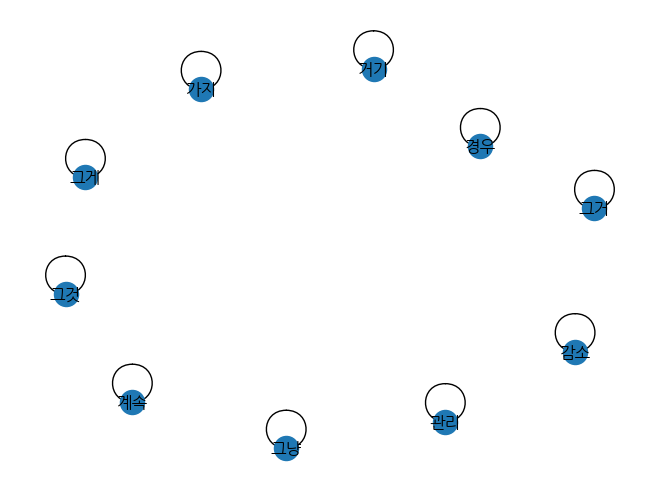

In [ ]:
#plt.rc('font', family="NanumGothic")
g = nx.Graph(ko_ttm[:10, :10])
en_map = dict(zip(g.nodes(), words_name))
nx.draw(g, labels=en_map, with_labels=True, font_family=ko_font_name)
plt.show()